# Supervised Machine Learning

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: Performance improvements after removing outliers

### 1. Importing dibraries and data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [14]:
# Define the path to the directory containing the file
path = r'C:\Users\melan\OneDrive\Career Foundry\World Happiness Report'

In [16]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\World Happiness Report'

In [18]:
# Import merged_df from the "02 Data/Prepared Data" directory
merged_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

### 2. Data cleaning

In [25]:
merged_df.columns

Index(['Unnamed: 0', 'Country or region', 'Overall rank', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Year'],
      dtype='object')

In [23]:
merged_df.head(10)

,Unnamed: 0,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [27]:
merged_df.shape

(782, 11)

In [29]:
# Check for missing values

merged_df.isnull().sum()

Unnamed: 0                      0
Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Year                            0
dtype: int64

In [31]:
#check for duplicates
dups = merged_df.duplicated()

In [33]:
dups.shape

(782,)

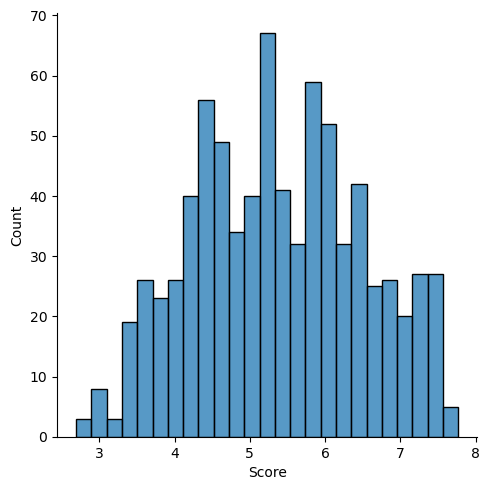

In [37]:
sns.displot(merged_df['Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [39]:
merged_df['Score'].mean() # Check the mean

5.379017902998669

In [41]:
merged_df['Score'].median() # Check the median

5.322

In [43]:
merged_df['Score'].max() # Check the maximum 

7.769

In [45]:
merged_df['Score'].min() # Check the minimum

2.69300007820129

### 3. Data prep for regression analysis

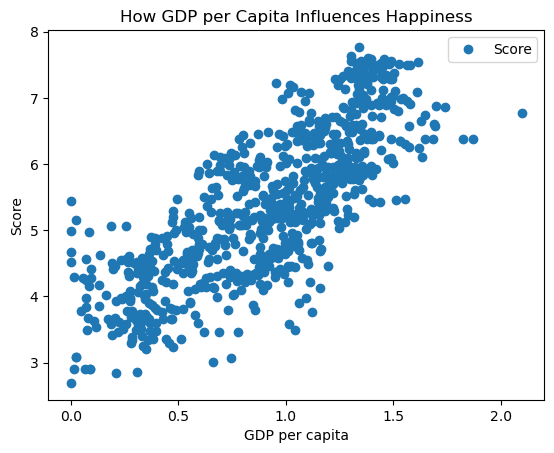

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

merged_df.plot(x = 'GDP per capita', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('How GDP per Capita Influences Happiness')  
plt.xlabel('GDP per capita')  
plt.ylabel('Score')  
plt.show()

#### Hypothesis: If the GDP per capita is high, then the country will also have a high happiness score.

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = merged_df['GDP per capita'].values.reshape(-1,1)
y = merged_df['Score'].values.reshape(-1,1)

In [53]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [55]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [57]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [60]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

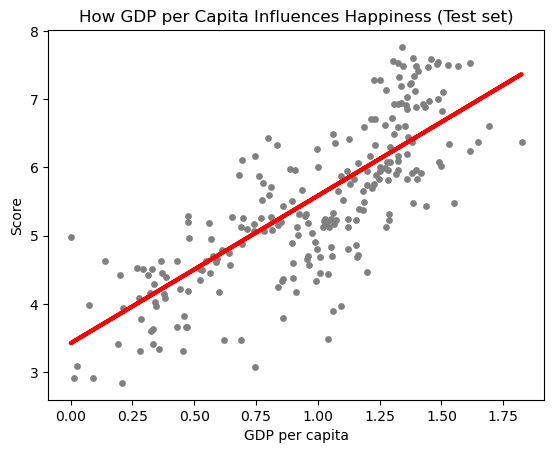

In [68]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('How GDP per Capita Influences Happiness (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Score')
plot_test.show()

In [70]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


Overall, this slope has a positive correlation. The higher the GDP per capita is, the higher the happiness score will be. This supports the hypothesis as stated above. The MSE is 0.5039. The data points follow the line but many are not close to the regression line. The R2 score of 0.6165 indicates approx 61.65% of the variance in the dependent variable (Happiness Score) can be explained by the independent variable (the GDP per capita) 

In [85]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

In [87]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


Compare how the regression fits the training set

In [89]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [90]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [91]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.4688002885509005
R2 score:  0.6245244479606318


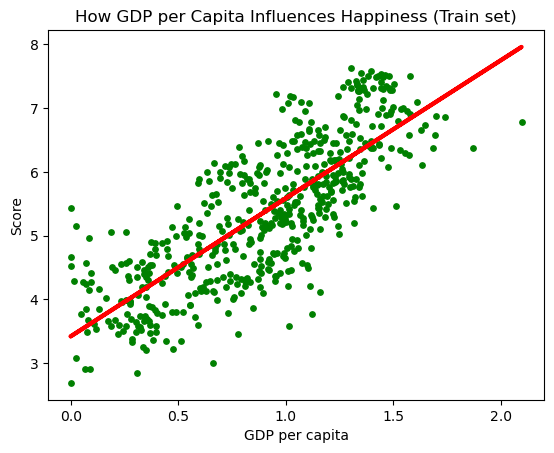

In [92]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('How GDP per Capita Influences Happiness (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Score')
plot_test.show()

Both sets show an identical slope (2.163) The train set has a lower MSE (0.4688 vs. 0.5039), indicating better accuracy in predicting the dependent variable (Score), both R2 scores of 0.6165 and 0.6245 explain 61% - 62% of the variance, the independent variable (GDP per capita) is a good predictor.

### Bonus: Performance improvements after removing outliers

In [161]:
# Clean the extreme values from the "GDP per capita" variable observed during the consistency checks.

df_test = merged_df[(merged_df['GDP per capita'] <= 2.835) | (merged_df['GDP per capita'] >= 7.89)]

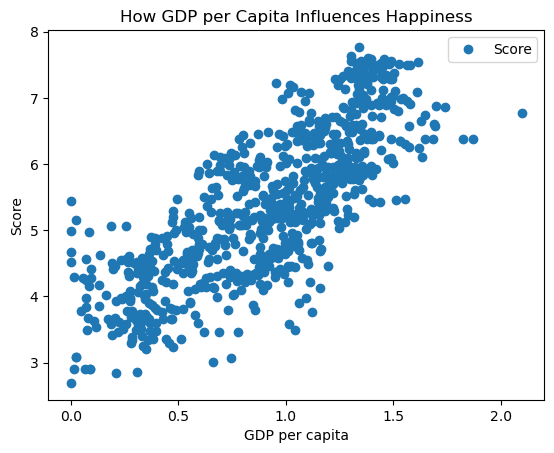

In [162]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'GDP per capita', y='Score', style='o')  
plt.title('How GDP per Capita Influences Happiness')  
plt.xlabel('GDP per capita')  
plt.ylabel('Score')  
plt.show()

In [163]:
# Reshape again.

X_2 = df_test['GDP per capita'].values.reshape(-1,1)
y_2 = df_test['Score'].values.reshape(-1,1)

In [164]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [165]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [166]:
y_predicted_2 = regression.predict(X_test_2)

In [167]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [168]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


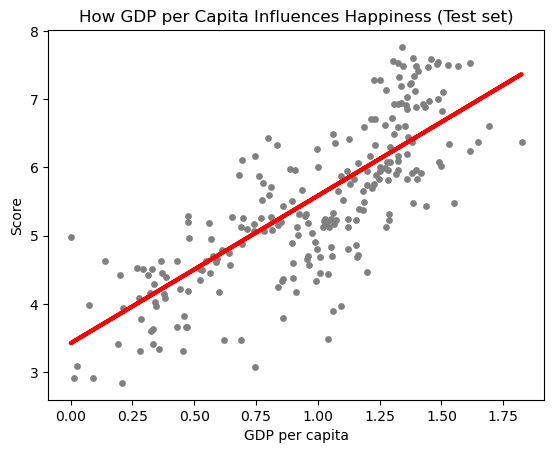

In [169]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('How GDP per Capita Influences Happiness (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Score')
plot_test.show()

In [170]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


After removing outliers, this still shows the same slope of 2.163, and 0.5039 for the mean squared value and the same R2 value of 0.6165, so ..there are lots of scattered points far from the regression line... this model may not be the best fit for this data set.